In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [97]:
# 2. Hãy tải dữ liệu từ file drug200.csv lưu vào data frame df
df = pd.read_csv('drug200.csv')

In [98]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [99]:
# 3. Kiểm tra thông tin dữ liệu, dùng hàm info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [100]:
# 4. Mô tả dữ liệu, dùng hàm describe
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [101]:
# 5. Kiểm tra kiểu dữ liệu, dùng types
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [102]:
# 6. Kiểm tra tên cột, dùng columns
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [103]:
# 7. Kiểm tra dữ liệu trống, dùng df.isnull().sum()
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [104]:
# 8. Kiểm tra dữ liệu trùng, dùng df.duplicated().sum()
df.duplicated().sum()

0

In [105]:
# 9. Đổi tên cột phù hợp ngữ nghĩa
df.rename(columns= {'Na_to_K' : 'Sodium_to_Potassium', 'BP' : 'Blood_Pressure'}, inplace = True)
df['Sex'].replace({'M': 'Male', 'F':'Female'}, inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

In [106]:
# KHẢO SÁT DỮ LIỆU VỚI KỸ THUẬT EDA
# 10. Thống kê số lượng người thuộc 5 nhóm tuổi cao nhất
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age' : top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


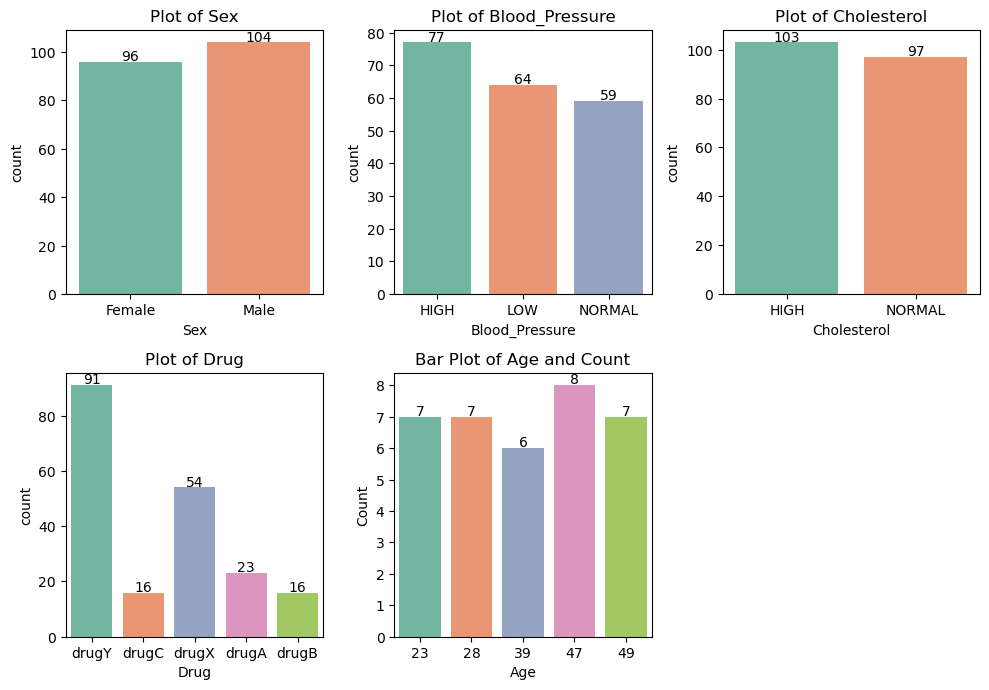

In [107]:
# 11. Tiến hành EDA dữ liệu. Sinh viên quan sát các biểu đồ và cho nhận xét
#EDA
def create_plot(ax, x, data, plot_type = 'count', y = None, palette = 'Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data = data, palette = palette, ax=ax)
    elif plot_type == 'bar' :
        sns.barplot(x=x, y=y, data=data, palette = palette, ax=ax)
        
    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')
                 
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va ='baseline',
                    fontsize=10, color="black",
                    xytext=(0, 1),
                    textcoords= 'offset points')
    #Create the figure and subplots
plt.figure(figsize = (10, 10))
    #Define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}
]
    #Loop through plot configurations to create subplots
for i, config in enumerate (plot_configs):
    ax = plt.subplot(3, 3, i+1)
    create_plot(ax, **config)
plt.tight_layout()
plt.show()

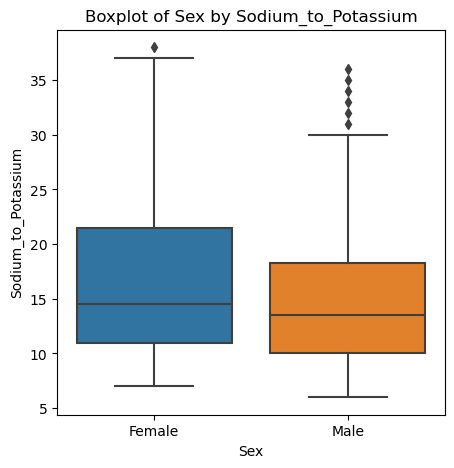

In [108]:
# 12. Tiến hành khảo sát dữ liệu outlier và cho nhận xét
plt.figure(figsize=(5, 5)) 
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df) 
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

In [109]:
# XÂY DỰNG MÔ HÌNH TRÍ TUỆ NHÂN TẠO
# 13. Tạo tập dữ liệu đặc trưng (feature) và mục tiêu (target)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [110]:
# 14. Tiến hành One Hot Encoder cho đặc trưng Sex và Label Encoder cho các categorical feature còn lại. Sinh viên giải thích tại sao làm như vậy?
#OneHot Encoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1) # Drop the original categorical columns
# Labelled encoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])

In [111]:
# 15. Sinh viên phân tách thành tập dữ liệu train và test với tỉ lệ 60:40, hệ số ngẫu nhiên là 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [112]:
# 16. Xây dựng mô hình với các hyperparameter tunning (siêu tham số điều chỉnh mô hình) 
# như sau: criterion="entropy", max_depth=6 và lamx_leaf_nodes=10. Sinh viên giải thích các siêu tham số
# Khởi tạo mô hình Decision Tree với các hyperparameters đã chỉ định
model = DecisionTreeClassifier(criterion="entropy", max_depth=6, max_leaf_nodes=10)

In [113]:
# 17. Tiến hành huấn luyện (train) mô hình trên tập dữ liệu huấn luyện
# Huấn luyện mô hình
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [114]:
# 18. Hiện thị danh sách các lớp mục tiêu phân lớp
classes = model.classes_
print("Danh sách các lớp mục tiêu phân lớp:", classes)

Danh sách các lớp mục tiêu phân lớp: ['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


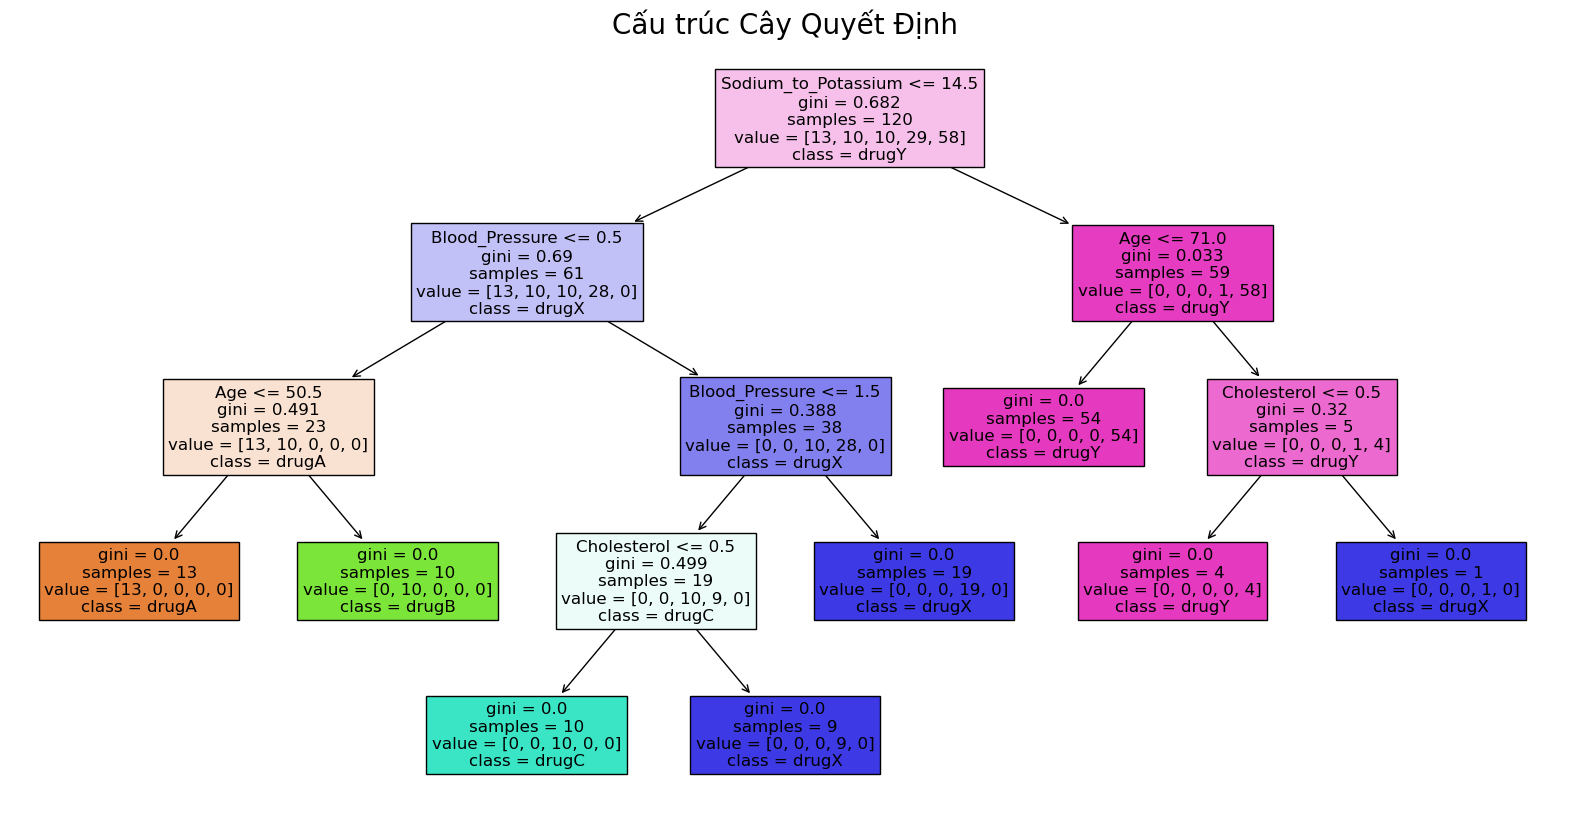

In [115]:
# 19.  Vẽ sơ đồ mô hình cây phân lớp. Sinh viên giải thích các số liệu trên từng node và leaf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

# Dữ liệu ví dụ (thay thế bằng dữ liệu thực tế của bạn)
# X_train = pd.DataFrame(...)  # Dữ liệu đặc trưng
# y_train = pd.Series(...)      # Dữ liệu mục tiêu

# Khởi tạo và huấn luyện mô hình cây quyết định
model = DecisionTreeClassifier()  # Bạn có thể điều chỉnh các tham số nếu cần
model.fit(X_train, y_train)

# Chuyển đổi tên các đặc trưng thành danh sách
feature_cols = X_train.columns.tolist()  # Đảm bảo đây là một danh sách

# Chuyển đổi class_names thành danh sách
class_names = model.classes_.tolist()  # Chuyển đổi thành danh sách

# Vẽ cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    class_names=class_names,  # Đảm bảo đây là một danh sách
    feature_names=feature_cols,
    fontsize=12,
    filled=True
)
plt.title("Cấu trúc Cây Quyết Định", fontsize=20)
plt.show()


In [116]:
# 20. Tính Entropy có trọng số (WE) và Information Gain khi phân tách Root thành Left – Right node


<img src="./1.png"> </img>

<img src="./2.png"></img>

<img src="./3.png"></img>